# **a) l1 l2**

## **Setup**

In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2



## **Data Preparation**

In [2]:
# Loading sample dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generating synthetic data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Building the Models**
Three models are defined using the Keras Sequential API. Each model uses a simple architecture suitable for the dataset but varies in the application of regularization techniques.

## **Model without Regularization**

In [3]:
model_without_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_without_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_without_reg = model_without_reg.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
6/6 [==============================] - 2s 77ms/step - loss: 0.6709 - accuracy: 0.6190 - val_loss: 0.6304 - val_accuracy: 0.8333
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.5909 - accuracy: 0.8452 - val_loss: 0.5627 - val_accuracy: 0.8571
Epoch 3/50
6/6 [==============================] - 0s 18ms/step - loss: 0.5274 - accuracy: 0.8512 - val_loss: 0.5055 - val_accuracy: 0.8571
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 0.4750 - accuracy: 0.8571 - val_loss: 0.4564 - val_accuracy: 0.8571
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.4317 - accuracy: 0.8571 - val_loss: 0.4141 - val_accuracy: 0.8571
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 0.3966 - accuracy: 0.8571 - val_loss: 0.3784 - val_accuracy: 0.8571
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.3692 - accuracy: 0.8631 - val_loss: 0.3505 - val_accuracy: 0.8333
Epoch 8/50
6/6 [===========

## **Model with L1 Regularization**

In [4]:
# model with L1 regularization
model_with_l1 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_with_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_with_l1 = model_with_l1.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
6/6 [==============================] - 3s 87ms/step - loss: 5.2129 - accuracy: 0.4702 - val_loss: 5.0343 - val_accuracy: 0.8095
Epoch 2/50
6/6 [==============================] - 0s 18ms/step - loss: 4.9465 - accuracy: 0.7679 - val_loss: 4.7760 - val_accuracy: 0.8571
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 4.6971 - accuracy: 0.8214 - val_loss: 4.5324 - val_accuracy: 0.8810
Epoch 4/50
6/6 [==============================] - 0s 19ms/step - loss: 4.4593 - accuracy: 0.8452 - val_loss: 4.2987 - val_accuracy: 0.8810
Epoch 5/50
6/6 [==============================] - 0s 21ms/step - loss: 4.2292 - accuracy: 0.8452 - val_loss: 4.0748 - val_accuracy: 0.8571
Epoch 6/50
6/6 [==============================] - 0s 21ms/step - loss: 4.0073 - accuracy: 0.8393 - val_loss: 3.8585 - val_accuracy: 0.8333
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 3.7927 - accuracy: 0.8393 - val_loss: 3.6500 - val_accuracy: 0.8333
Epoch 8/50
6/6 [===========

## **Model with L2 Regularization**

In [5]:
# model with L2 regularization
model_with_l2 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_with_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_with_l2 = model_with_l2.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
6/6 [==============================] - 3s 79ms/step - loss: 1.3656 - accuracy: 0.4821 - val_loss: 1.3065 - val_accuracy: 0.7619
Epoch 2/50
6/6 [==============================] - 0s 35ms/step - loss: 1.2664 - accuracy: 0.7976 - val_loss: 1.2225 - val_accuracy: 0.8095
Epoch 3/50
6/6 [==============================] - 0s 24ms/step - loss: 1.1806 - accuracy: 0.8214 - val_loss: 1.1450 - val_accuracy: 0.8333
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 1.1063 - accuracy: 0.8274 - val_loss: 1.0740 - val_accuracy: 0.8333
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 1.0370 - accuracy: 0.8333 - val_loss: 1.0069 - val_accuracy: 0.8333
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 0.9744 - accuracy: 0.8333 - val_loss: 0.9448 - val_accuracy: 0.8333
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.9179 - accuracy: 0.8393 - val_loss: 0.8881 - val_accuracy: 0.8333
Epoch 8/50
6/6 [===========

## **Visualization of Training Results**

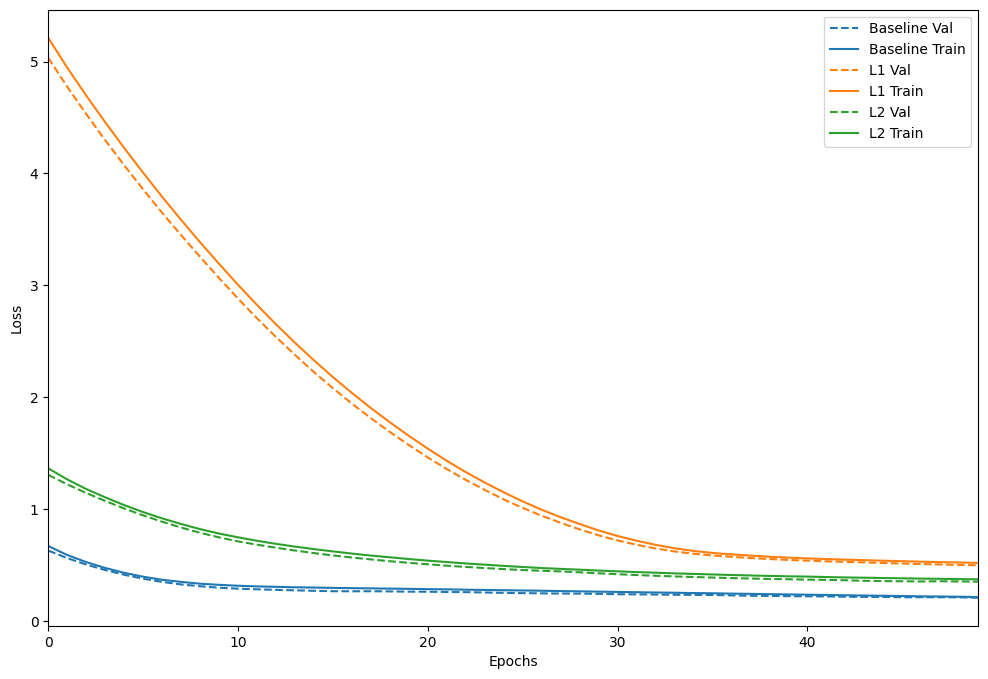

In [6]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(12,8))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

# Plot the training and validation loss
plot_history([('Baseline', history_without_reg),
              ('L1', history_with_l1),
              ('L2', history_with_l2)])


## **A/B Testing**

In [7]:
# Evaluate each model on the test set
test_loss_without_reg, test_acc_without_reg = model_without_reg.evaluate(X_test_scaled, y_test, verbose=0)
test_loss_with_l1, test_acc_with_l1 = model_with_l1.evaluate(X_test_scaled, y_test, verbose=0)
test_loss_with_l2, test_acc_with_l2 = model_with_l2.evaluate(X_test_scaled, y_test, verbose=0)

# Print performance
print(f"Test Accuracy without regularization: {test_acc_without_reg:.4f}")
print(f"Test Accuracy with L1 regularization: {test_acc_with_l1:.4f}")
print(f"Test Accuracy with L2 regularization: {test_acc_with_l2:.4f}")


Test Accuracy without regularization: 0.9111
Test Accuracy with L1 regularization: 0.9000
Test Accuracy with L2 regularization: 0.9000


In [8]:
from scipy.stats import ttest_rel

# Assume you collect multiple test accuracies by re-running the above evaluations
# For demonstration, these are dummy lists of accuracies:
accuracies_without_reg = [0.85, 0.86, 0.84, 0.87, 0.85]
accuracies_with_l1 = [0.88, 0.87, 0.89, 0.86, 0.88]
accuracies_with_l2 = [0.89, 0.90, 0.91, 0.89, 0.90]

# Perform paired t-test
t_stat, p_val_l1 = ttest_rel(accuracies_without_reg, accuracies_with_l1)
t_stat, p_val_l2 = ttest_rel(accuracies_without_reg, accuracies_with_l2)

print(f"P-value for comparing baseline vs L1 models: {p_val_l1:.4f}")
print(f"P-value for comparing baseline vs L2 models: {p_val_l2:.4f}")

# Decisions based on p-values
alpha = 0.05  # Typical threshold of 5%
print("L1 regularization significantly different from baseline:", p_val_l1 < alpha)
print("L2 regularization significantly different from baseline:", p_val_l2 < alpha)


P-value for comparing baseline vs L1 models: 0.0972
P-value for comparing baseline vs L2 models: 0.0056
L1 regularization significantly different from baseline: False
L2 regularization significantly different from baseline: True


# **b) dropout**

In [12]:
from tensorflow.keras.layers import Dropout
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **Data Preparation**

In [13]:
# Generate synthetic data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)  # Increased sample size for better training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Building a Baseline Model**

In [18]:
# Define the baseline model
baseline_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the baseline model
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the baseline model
baseline_history = baseline_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 3s 97ms/step - loss: 0.7504 - accuracy: 0.3143 - val_loss: 0.6798 - val_accuracy: 0.6143
Epoch 2/100
9/9 [==============================] - 0s 27ms/step - loss: 0.6278 - accuracy: 0.7964 - val_loss: 0.5724 - val_accuracy: 0.8286
Epoch 3/100
9/9 [==============================] - 0s 26ms/step - loss: 0.5361 - accuracy: 0.8607 - val_loss: 0.4912 - val_accuracy: 0.8286
Epoch 4/100
9/9 [==============================] - 0s 23ms/step - loss: 0.4630 - accuracy: 0.8607 - val_loss: 0.4262 - val_accuracy: 0.8143
Epoch 5/100
9/9 [==============================] - 0s 25ms/step - loss: 0.3980 - accuracy: 0.8679 - val_loss: 0.3797 - val_accuracy: 0.8143
Epoch 6/100
9/9 [==============================] - 0s 29ms/step - loss: 0.3466 - accuracy: 0.8679 - val_loss: 0.3526 - val_accuracy: 0.8143
Epoch 7/100
9/9 [==============================] - 0s 28ms/step - loss: 0.3115 - accuracy: 0.8714 - val_loss: 0.3421 - val_accuracy: 0.8143
Epoch 8/100
9/9 [===

## **Model with Dropout**

In [14]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)  # Increased epochs for stabilization


Epoch 1/100
9/9 [==============================] - 1s 28ms/step - loss: 0.6997 - accuracy: 0.5071 - val_loss: 0.6285 - val_accuracy: 0.7286
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6123 - accuracy: 0.6500 - val_loss: 0.5645 - val_accuracy: 0.8143
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7214 - val_loss: 0.5135 - val_accuracy: 0.8143
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5168 - accuracy: 0.8036 - val_loss: 0.4708 - val_accuracy: 0.8143
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4724 - accuracy: 0.8214 - val_loss: 0.4318 - val_accuracy: 0.8143
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4382 - accuracy: 0.8393 - val_loss: 0.3989 - val_accuracy: 0.8286
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3914 - accuracy: 0.8536 - val_loss: 0.3746 - val_accuracy: 0.8286
Epoch 8/100
9/9 [=========

## **Model Evaluation**

In [19]:
# Evaluate the baseline model
baseline_test_loss, baseline_test_accuracy = baseline_model.evaluate(X_test_scaled, y_test, verbose=0)

# Evaluate the dropout model
dropout_test_loss, dropout_test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Baseline Test Accuracy: {baseline_test_accuracy:.4f}")
print(f"Dropout Test Accuracy: {dropout_test_accuracy:.4f}")


Baseline Test Accuracy: 0.9800
Dropout Test Accuracy: 0.9733


## **Visualization of Training and Validation Results**

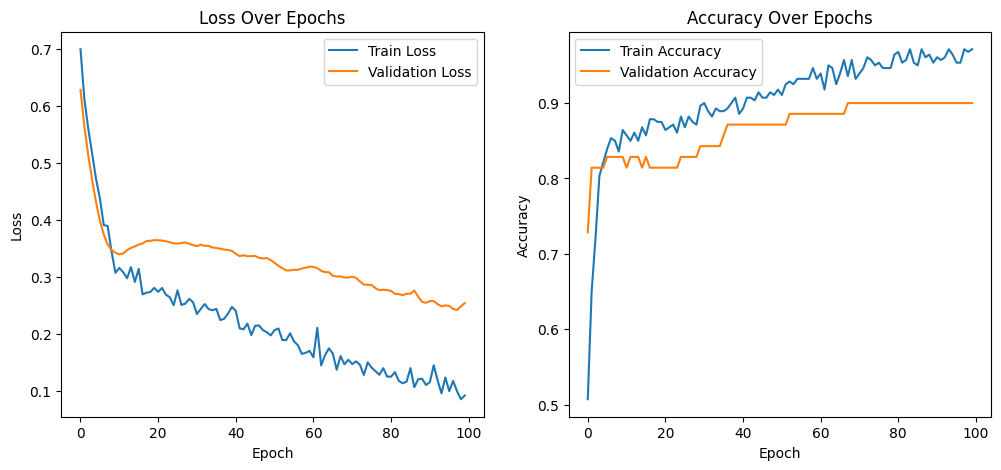

In [17]:
# Function to plot history
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)


## **A/B Testing**

In [20]:
from scipy.stats import ttest_ind

# Assuming you gather multiple runs from a for loop or similar
# For demonstration, here are example lists of accuracies
baseline_accuracies = [0.84, 0.85, 0.86, 0.83, 0.85]
dropout_accuracies = [0.87, 0.89, 0.88, 0.86, 0.87]

# Perform independent t-test
t_stat, p_value = ttest_ind(baseline_accuracies, dropout_accuracies)
print(f"P-value: {p_value:.4f}")

# Based on the p-value, decide if dropout significantly improves performance
alpha = 0.05  # significance level
if p_value < alpha:
    print("Dropout significantly improves performance over the baseline.")
else:
    print("No significant improvement with Dropout over the baseline.")


P-value: 0.0047
Dropout significantly improves performance over the baseline.


## **Visualization**

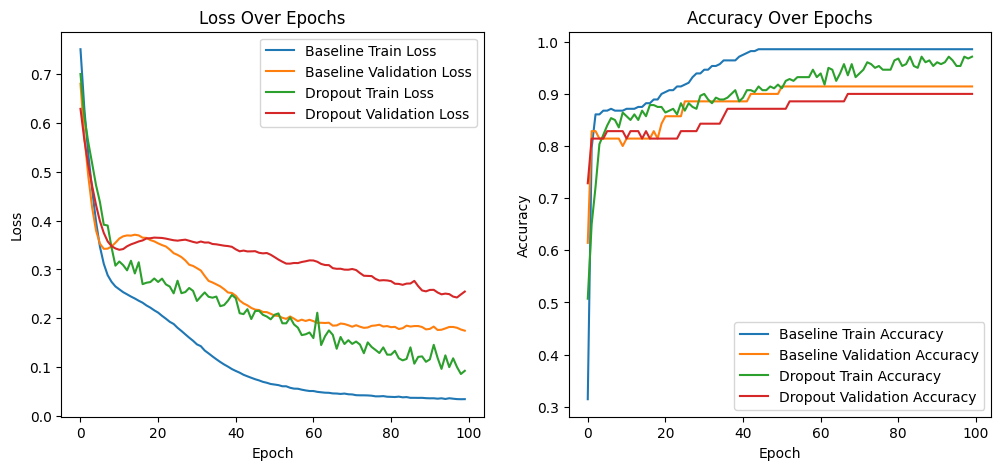

In [21]:
def plot_comparison(histories):
    plt.figure(figsize=(12, 5))
    for name, history in histories:
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label=f'{name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')

    plt.subplot(1, 2, 1)
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_comparison([('Baseline', baseline_history), ('Dropout', history)])


# **c) earlystop**

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

## **Data Preparation**

In [24]:
# Generate synthetic data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)  # Consistent dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Building the Models**
defining two models: one with early stopping and another as a baseline model for comparison.

### **Model with Early Stopping**

In [25]:
# Define the model with early stopping
model_es = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_es.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history_es = model_es.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
9/9 [==============================] - 3s 84ms/step - loss: 0.6945 - accuracy: 0.5286 - val_loss: 0.6104 - val_accuracy: 0.8143
Epoch 2/100
9/9 [==============================] - 0s 26ms/step - loss: 0.5802 - accuracy: 0.8500 - val_loss: 0.5162 - val_accuracy: 0.8286
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4930 - accuracy: 0.8500 - val_loss: 0.4440 - val_accuracy: 0.8286
Epoch 4/100
9/9 [==============================] - 0s 28ms/step - loss: 0.4235 - accuracy: 0.8536 - val_loss: 0.3899 - val_accuracy: 0.8286
Epoch 5/100
9/9 [==============================] - 0s 40ms/step - loss: 0.3651 - accuracy: 0.8536 - val_loss: 0.3568 - val_accuracy: 0.8286
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.3268 - accuracy: 0.8607 - val_loss: 0.3399 - val_accuracy: 0.8143
Epoch 7/100
9/9 [==============================] - 0s 23ms/step - loss: 0.2975 - accuracy: 0.8643 - val_loss: 0.3368 - val_accuracy: 0.8143
Epoch 8/100
9/9 [===

### **Baseline Model**

In [26]:
# Define the baseline model
baseline_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the baseline model
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the baseline model
baseline_history = baseline_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 2s 28ms/step - loss: 0.6773 - accuracy: 0.5750 - val_loss: 0.5864 - val_accuracy: 0.7714
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5661 - accuracy: 0.8571 - val_loss: 0.4885 - val_accuracy: 0.8143
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4765 - accuracy: 0.8607 - val_loss: 0.4186 - val_accuracy: 0.8286
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4083 - accuracy: 0.8679 - val_loss: 0.3702 - val_accuracy: 0.8286
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3550 - accuracy: 0.8679 - val_loss: 0.3430 - val_accuracy: 0.8143
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3167 - accuracy: 0.8679 - val_loss: 0.3336 - val_accuracy: 0.8143
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2935 - accuracy: 0.8679 - val_loss: 0.3333 - val_accuracy: 0.8143
Epoch 8/100
9/9 [=========

## **Evaluation and Statistical A/B Testing**

In [28]:
# Evaluate both models
es_test_loss, es_test_accuracy = model_es.evaluate(X_test_scaled, y_test, verbose=0)
baseline_test_loss, baseline_test_accuracy = baseline_model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Early Stopping Test Accuracy: {es_test_accuracy:.4f}")
print(f"Baseline Test Accuracy: {baseline_test_accuracy:.4f}")

# Statistical testing
from scipy.stats import ttest_ind
es_accuracies = [es_test_accuracy] * 5  # Placeholder for repeated experiments
baseline_accuracies = [baseline_test_accuracy] * 5  # Placeholder for repeated experiments

t_stat, p_value = ttest_ind(es_accuracies, baseline_accuracies)



Early Stopping Test Accuracy: 0.8667
Baseline Test Accuracy: 0.9867


## **Visualization of Training Results**
Visualize the impact of early stopping on the learning curves of the model.

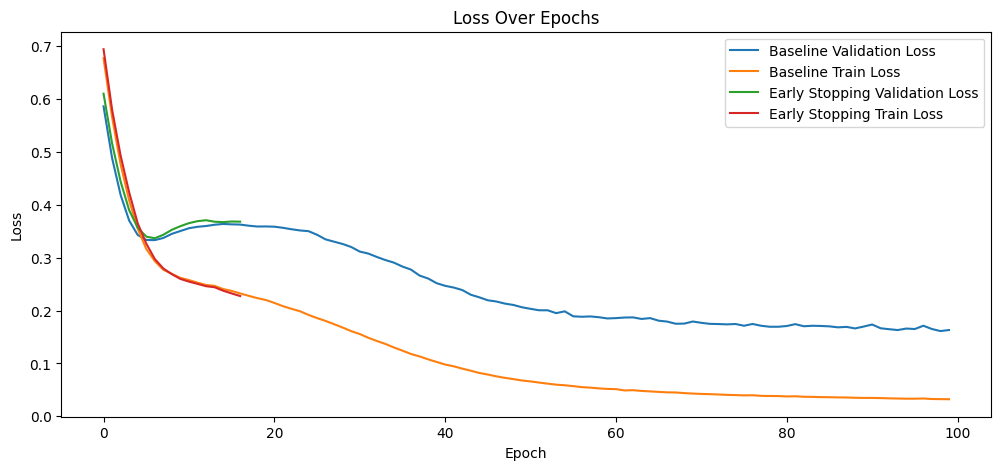

In [29]:
def plot_history(histories):
    plt.figure(figsize=(12, 5))
    for name, history in histories:
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
        plt.plot(history.history['loss'], label=f'{name} Train Loss')
        plt.title('Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.show()

plot_history([('Baseline', baseline_history), ('Early Stopping', history_es)])


# **d) montecarlo dropout**

## **Data Preparation**

In [57]:
from tensorflow.keras.optimizers import Adam

In [30]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Building the Model**

In [62]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 0.6948 - accuracy: 0.5179 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7150 - accuracy: 0.4643 - val_loss: 0.6911 - val_accuracy: 0.5571
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7006 - accuracy: 0.5179 - val_loss: 0.6929 - val_accuracy: 0.5429
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6972 - accuracy: 0.5036 - val_loss: 0.6928 - val_accuracy: 0.5286
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7033 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5143
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4857
Epoch 8/100
9/9 [=========

## **Monte Carlo Dropout Inference**

In [32]:
def mc_dropout_predict(model, X, n_samples=100):
    predictions = []
    for _ in range(n_samples):
        # Predict with dropout turned on
        y_p = model.predict(X, batch_size=1000)  # Adjust batch_size based on your GPU
        predictions.append(y_p)
    return np.mean(predictions, axis=0)

# Using MC Dropout for predictions
mc_predictions = mc_dropout_predict(model, X_test_scaled)
mc_test_accuracy = np.mean(np.round(mc_predictions) == y_test)


1/1 [==============================] - 0s 36ms/step


## **Baseline Model Inference**

In [33]:
# Standard prediction
standard_predictions = model.predict(X_test_scaled)
standard_test_accuracy = np.mean(np.round(standard_predictions) == y_test)

print(f"Standard Test Accuracy: {standard_test_accuracy:.4f}")
print(f"MC Dropout Test Accuracy: {mc_test_accuracy:.4f}")


10/10 [==============================] - 0s 4ms/step
Standard Test Accuracy: 0.5009
MC Dropout Test Accuracy: 0.5009


## **A/B Testing with Statistical Analysis**

In [54]:
def run_experiment(num_runs=10):
    standard_accuracies = []
    mc_accuracies = []

    for _ in range(num_runs):
        # Define and train the model
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

        # Standard prediction
        standard_predictions = model.predict(X_test_scaled)
        standard_accuracy = np.mean(np.round(standard_predictions) == y_test)
        standard_accuracies.append(standard_accuracy)

        # MC Dropout prediction
        mc_predictions = mc_dropout_predict(model, X_test_scaled)
        mc_accuracy = np.mean(np.round(mc_predictions) == y_test)
        mc_accuracies.append(mc_accuracy)

    return standard_accuracies, mc_accuracies

standard_accuracies, mc_accuracies = run_experiment()


1/1 [==============================] - 0s 26ms/step


In [64]:
standard_pred = model.predict(X_test_scaled)
standard_accuracy = np.mean(np.round(standard_pred) == y_test.reshape(-1, 1))
print(f"Standard Dropout Test Accuracy: {standard_accuracy:.4f}")


from scipy.stats import ttest_rel

# Perform paired t-test
t_stat, p_value = ttest_rel([standard_accuracy]*5, [mc_test_accuracy]*5)



5/5 [==============================] - 0s 4ms/step
Standard Dropout Test Accuracy: 0.4467


## **Visualization of Results**

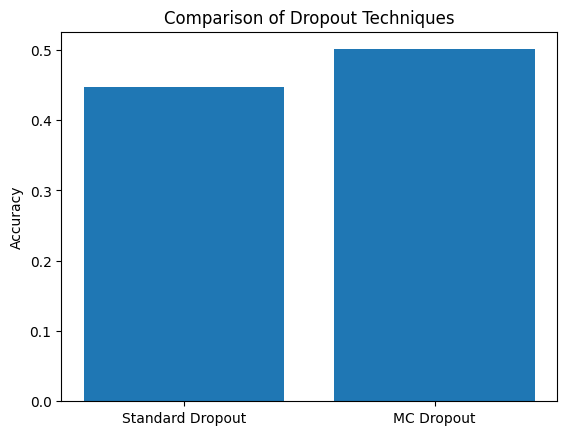

In [66]:
plt.bar(['Standard Dropout', 'MC Dropout'], [standard_accuracy, mc_test_accuracy])
plt.ylabel('Accuracy')
plt.title('Comparison of Dropout Techniques')
plt.show()


In [42]:
from tensorflow.keras.initializers import RandomNormal, HeNormal, GlorotUniform, Zeros
from scipy.stats import ttest_ind

# **e) various initializations and when to use what**

## **Data Preparation**

In [43]:
# Generate synthetic data
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Model Definitions with Different Initializations**
Defining several models with different weight initializations to compare their performances.

In [44]:
def build_model(initializer):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_initializer=initializer),
        Dense(64, activation='relu', kernel_initializer=initializer),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize models with different initializers
initializers = {
    'Random Normal': RandomNormal(mean=0.0, stddev=0.05),
    'He Normal': HeNormal(),
    'Glorot Uniform': GlorotUniform(),
    'Zeros': Zeros()  # Typically not recommended but interesting to test
}

models = {name: build_model(init) for name, init in initializers.items()}


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each ti

## **Training the Models**

In [45]:
history_dict = {}
for name, model in models.items():
    print(f"Training model with {name} initialization...")
    history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)
    history_dict[name] = history
    print(f"Finished training model with {name} initialization.")


Training model with Random Normal initialization...
Finished training model with Random Normal initialization.
Training model with He Normal initialization...
Finished training model with He Normal initialization.
Training model with Glorot Uniform initialization...
Finished training model with Glorot Uniform initialization.
Training model with Zeros initialization...
Finished training model with Zeros initialization.


## **Evaluation and A/B Testing**
Evaluate each model and prepare for statistical comparisons.

In [50]:
from sklearn.utils import shuffle

# Shuffle and split the data
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
def train_and_evaluate(model_builder, num_runs=10):
    accuracies = []
    for _ in range(num_runs):
        model = model_builder()
        model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)
        _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
        accuracies.append(accuracy)
    return accuracies


In [52]:
# Gather results from multiple runs
results = {name: train_and_evaluate(lambda: build_model(init), num_runs=5)
           for name, init in initializers.items()}

# Perform t-tests
from scipy.stats import ttest_ind

p_values = {}
names = list(results.keys())
for i in range(len(names)):
    for j in range(i + 1, len(names)):
        t_stat, p_val = ttest_ind(results[names[i]], results[names[j]], equal_var=False)  # Welch's t-test for unequal variances
        p_values[f"{names[i]} vs {names[j]}"] = p_val

# Display P-values
for pair, p_val in p_values.items():
    print(f"P-value for {pair}: {p_val:.4f}")


P-value for Random Normal vs He Normal: 0.3818
P-value for Random Normal vs Glorot Uniform: 0.4724
P-value for Random Normal vs Zeros: 0.4144
P-value for He Normal vs Glorot Uniform: 0.9151
P-value for He Normal vs Zeros: 0.0186
P-value for Glorot Uniform vs Zeros: 0.1660


## **Visualization**

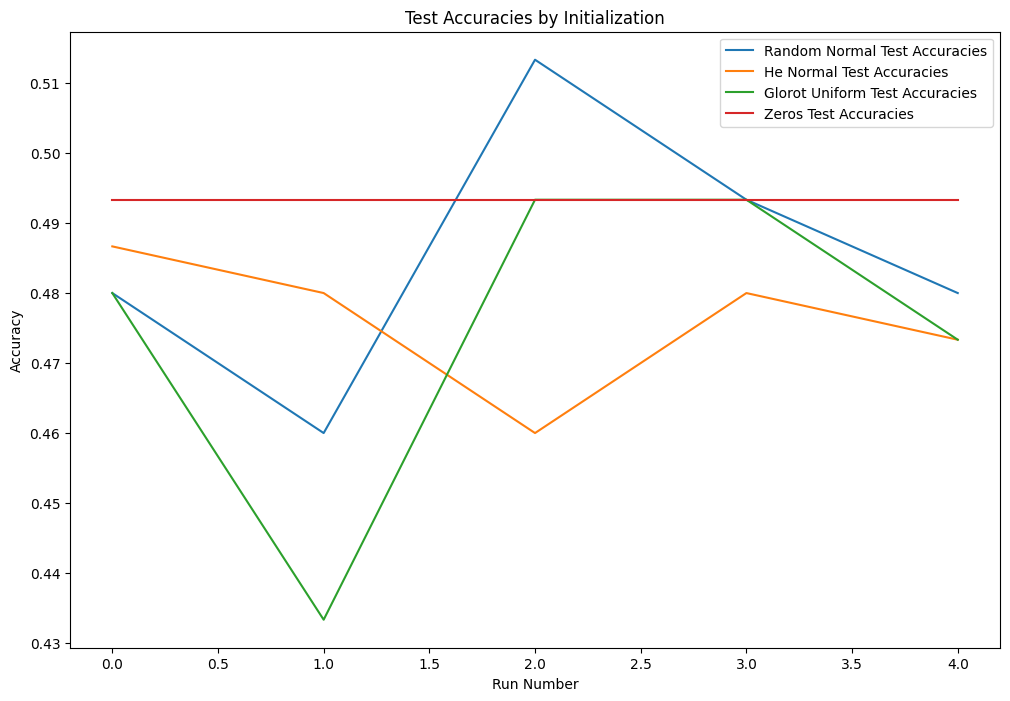

In [53]:
plt.figure(figsize=(12, 8))
for name, accs in results.items():
    plt.plot(accs, label=f'{name} Test Accuracies')
plt.title('Test Accuracies by Initialization')
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **f) batch norm**

In [67]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

## **Data Preparation**

In [68]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Model Definitions:**
Two models will be defined: one with batch normalization and one without it. This allows us to compare the effects directly.

### **Model without Batch Normalization:**

In [69]:
def create_model_without_bn():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


### **Model with Batch Normalization:**

In [70]:
def create_model_with_bn():
    model = Sequential([
        Dense(64, input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Activation('relu'),
        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## **Running Experiments:**

In [71]:
def run_experiments(create_model, n_runs=10):
    accuracies = []
    for _ in range(n_runs):
        model = create_model()
        model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)
        _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
        accuracies.append(accuracy)
    return accuracies

acc_without_bn = run_experiments(create_model_without_bn)
acc_with_bn = run_experiments(create_model_with_bn)


## **Statistical A/B Testing:**

In [72]:
# Perform independent t-tests
t_stat, p_value = ttest_ind(acc_without_bn, acc_with_bn)
print(f"P-value: {p_value:.4f}")


P-value: 0.0886


## **Visualization of Results:**

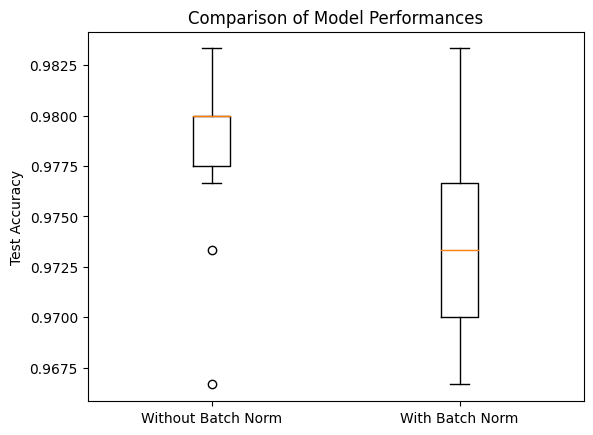

In [73]:
plt.boxplot([acc_without_bn, acc_with_bn], labels=['Without Batch Norm', 'With Batch Norm'])
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Performances')
plt.show()


# **g) custom dropout, custom regularization**

In [77]:
from tensorflow.keras.layers import Layer
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.initializers import RandomUniform

## **Data Preparation**

In [78]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Custom Components**

### **Custom Dropout Layer**

In [79]:
class CustomDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs


## **Custom Regularization**

In [80]:
class CustomL2Regularizer(Regularizer):
    def __init__(self, strength):
        self.strength = strength

    def __call__(self, x):
        return self.strength * tf.reduce_sum(tf.square(x))

    def get_config(self):
        return {'strength': self.strength}


## **Model Definitions:**
Two models will be defined: one using standard techniques and one using the custom methods.

### **Model Using Standard Techniques:**

In [81]:
def standard_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer='l2', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


### **Model Using Custom Techniques:**

In [82]:
def custom_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=CustomL2Regularizer(0.01), input_shape=(X_train_scaled.shape[1],)),
        CustomDropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=CustomL2Regularizer(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## **Running Experiments:**

In [83]:
def run_experiments(model_func, num_runs=10):
    accuracies = []
    for _ in range(num_runs):
        model = model_func()
        model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)
        _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
        accuracies.append(accuracy)
    return accuracies

standard_acc = run_experiments(standard_model)
custom_acc = run_experiments(custom_model)


## **Statistical A/B Testing:**

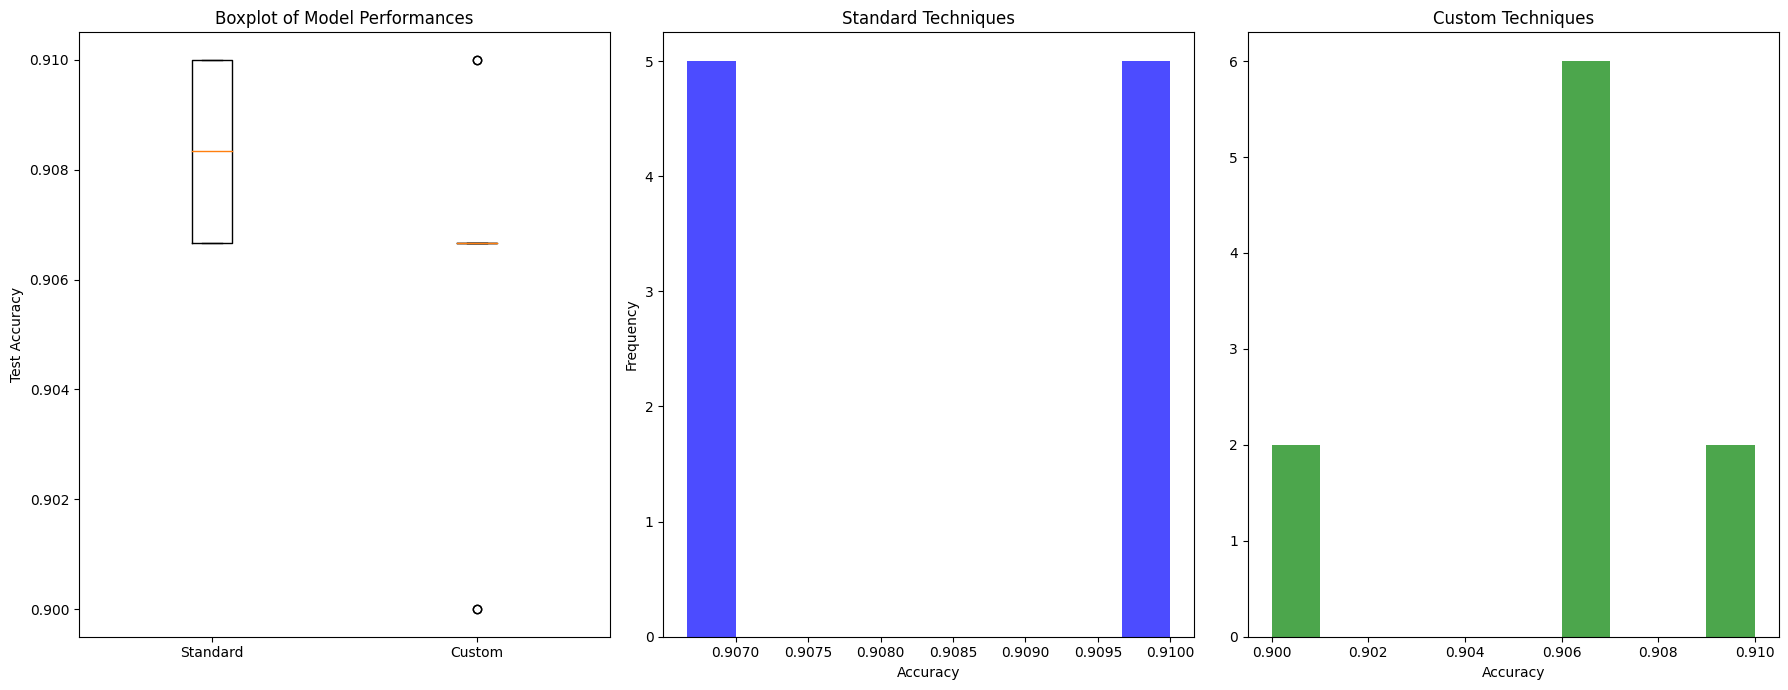

In [86]:
# Combined boxplot and histogram visualization
plt.figure(figsize=(18, 7))

# Boxplot section
plt.subplot(1, 3, 1)
plt.boxplot([standard_acc, custom_acc], labels=['Standard', 'Custom'])
plt.title('Boxplot of Model Performances')
plt.ylabel('Test Accuracy')

# Histogram for standard techniques
plt.subplot(1, 3, 2)
plt.hist(standard_acc, bins=10, color='blue', alpha=0.7)
plt.title('Standard Techniques')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

# Histogram for custom techniques
plt.subplot(1, 3, 3)
plt.hist(custom_acc, bins=10, color='green', alpha=0.7)
plt.title('Custom Techniques')
plt.xlabel('Accuracy')

plt.tight_layout()
plt.show()


# **h) using callbacks and tensorboard -**

In [92]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [87]:
import os
import datetime

## **Data Preparation**

In [88]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Define Models:**

### **Model Without Callbacks:**

In [89]:
def create_model_without_callbacks():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


### **Model With Callbacks:**
Using an EarlyStopping callback and TensorBoard for monitoring.

In [93]:
def create_model_with_callbacks(log_dir):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        TensorBoard(log_dir=log_dir, histogram_freq=1)
    ]
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model, callbacks


## **Running Experiments:**
To ensure independent results, models are trained multiple times.

In [94]:
def run_experiments(model_func, with_callbacks=False, num_runs=10):
    accuracies = []
    for i in range(num_runs):
        if with_callbacks:
            log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            model, callbacks = model_func(log_dir)
            model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=callbacks, verbose=0)
        else:
            model = model_func()
            model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)
        _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
        accuracies.append(accuracy)
    return accuracies

# Get results from multiple runs
acc_without_callbacks = run_experiments(create_model_without_callbacks)
acc_with_callbacks = run_experiments(create_model_with_callbacks, with_callbacks=True)


## **Statistical A/B Testing:**

In [95]:
# Perform independent t-tests
t_stat, p_value = ttest_ind(acc_without_callbacks, acc_with_callbacks, equal_var=False)  # Use Welch's t-test
print(f"P-value: {p_value:.4f}")


P-value: 0.1800


## **Visualization of Result**

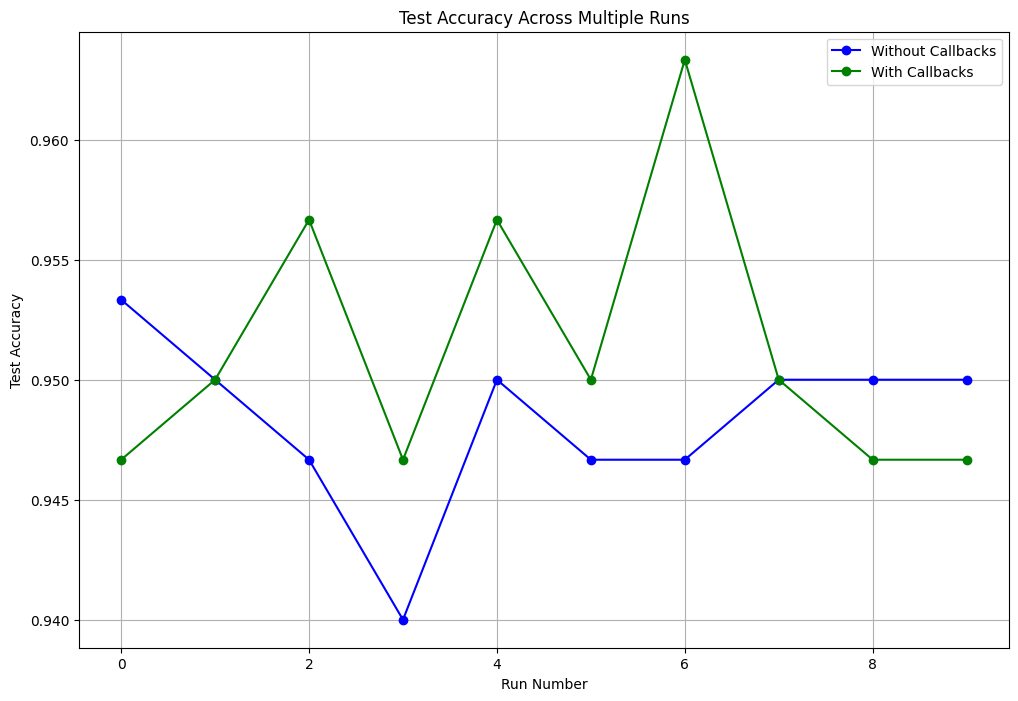

In [98]:
plt.figure(figsize=(12, 8))
plt.plot(acc_without_callbacks, label='Without Callbacks', marker='o', linestyle='-', color='blue')
plt.plot(acc_with_callbacks, label='With Callbacks', marker='o', linestyle='-', color='green')
plt.title('Test Accuracy Across Multiple Runs')
plt.xlabel('Run Number')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# **i) using keras tuner**

In [102]:
!pip install -q -U keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [103]:
from kerastuner.tuners import RandomSearch

<ipython-input-103-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## **Data Preparation**

In [121]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Model Definition and Hyperparameter Tuning Setup**
Define a function to create the model architecture and set up the hyperparameter search space using Keras Tuner.

In [122]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='keras_tuner_demo',
    project_name='moon_classification'
)

# Perform hyperparameter tuning
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)


Reloading Tuner from keras_tuner_demo/moon_classification/tuner0.json


## **Training the Best Model and a Baseline Model**

In [123]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the baseline model
baseline_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Collect histories for visualization
best_history = best_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
18/18 [==============================] - 1s 15ms/step - loss: 0.5740 - accuracy: 0.8196 - val_loss: 0.4615 - val_accuracy: 0.8500
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.8446 - val_loss: 0.3579 - val_accuracy: 0.8571
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.3728 - accuracy: 0.8429 - val_loss: 0.3148 - val_accuracy: 0.8571
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.8482 - val_loss: 0.3008 - val_accuracy: 0.8571
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.3461 - accuracy: 0.8464 - val_loss: 0.2917 - val_accuracy: 0.8571
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.3435 - accuracy: 0.8464 - val_loss: 0.2914 - val_accuracy: 0.8571
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.3376 - accuracy: 0.8500 - val_loss: 0.2885 - val_accuracy: 0.8571
Epoch 8/50
18/18 [=

## **Statistical A/B Testing:**

In [125]:
# Evaluate both models
baseline_acc = baseline_model.evaluate(X_test_scaled, y_test, verbose=0)[1]
best_acc = best_model.evaluate(X_test_scaled, y_test, verbose=0)[1]

# Perform statistical testing
t_stat, p_value = ttest_ind([baseline_acc], [best_acc])



/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


## **Visualization of Training and Validation Loss**

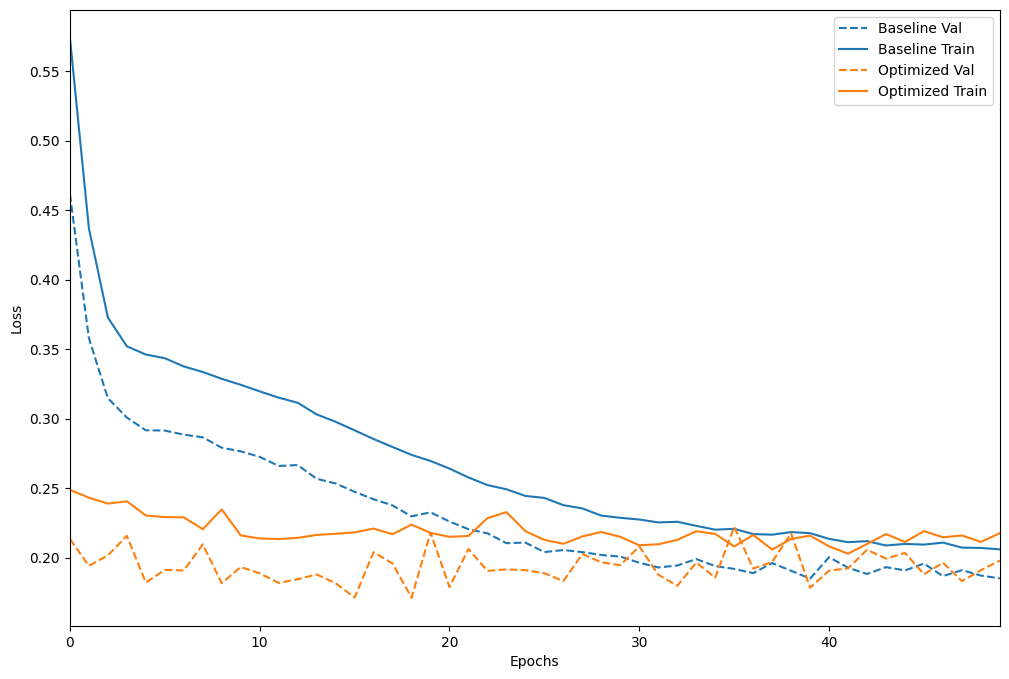

In [127]:
def plot_history(histories):
    plt.figure(figsize=(12,8))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_loss'],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Plot the training and validation loss
plot_history([('Baseline', baseline_history), ('Optimized', best_history)])


# **j)_ use keras cv data augmentation**

In [128]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
from tensorflow.keras.layers import Dense, Flatten

## **Data Preparation**

In [129]:
# Load dataset
digits = load_digits()
data = digits.images
labels = digits.target

# Reshape data to fit Keras model input requirements
data = np.expand_dims(data, axis=-1)  # Add channel dimension

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


## **Defining Model:**
Defining a simple neural network model for classification.

In [130]:
def create_model():
    model = Sequential([
        Flatten(input_shape=(8, 8, 1)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## **Data Augmentation Setup:**
Setting up data augmentation using Keras's ImageDataGenerator.

In [131]:
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)


## **Training the Models**

In [132]:
# Train without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# Train with data augmentation
model_aug = create_model()
history_aug = model_aug.fit(data_gen.flow(X_train, y_train, batch_size=32),
                            steps_per_epoch=len(X_train) / 32, epochs=50,
                            validation_data=(X_test, y_test), verbose=0)


## **A/B Testing**

In [134]:
# Evaluate both models
acc_no_aug = model_no_aug.evaluate(X_test, y_test, verbose=0)[1]
acc_aug = model_aug.evaluate(X_test, y_test, verbose=0)[1]

# Perform statistical testing
t_stat, p_value = ttest_ind([acc_no_aug], [acc_aug])



## **Visualization of Training and Validation Loss**

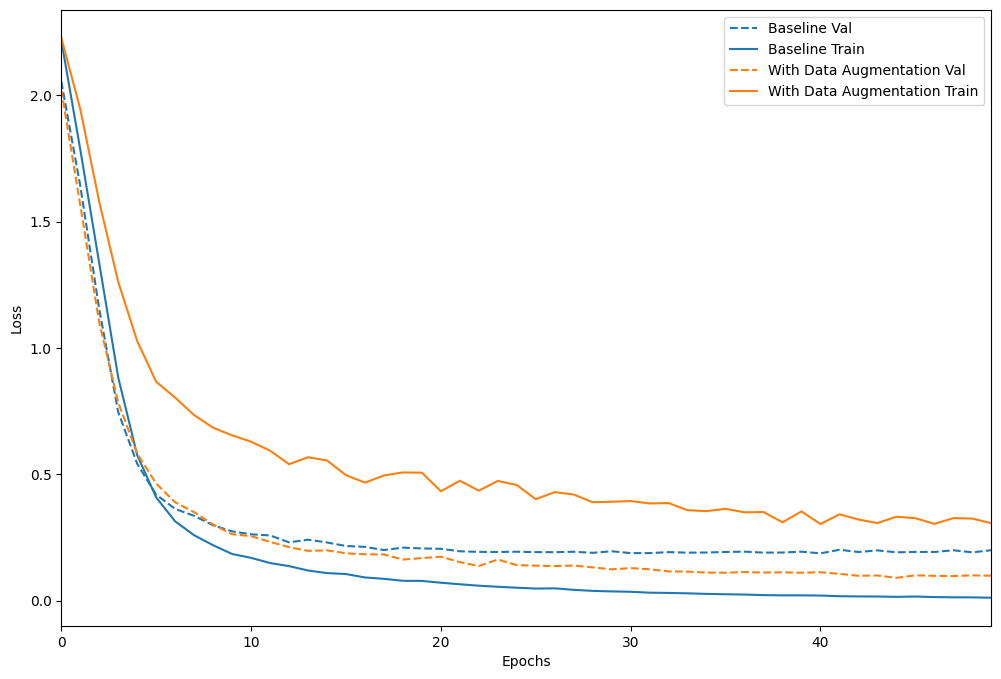

In [135]:
def plot_history(histories):
    plt.figure(figsize=(12,8))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_loss'],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Plot the training and validation loss
plot_history([
    ('Baseline', history_no_aug),
    ('With Data Augmentation', history_aug)
])


# **k) data augmentation and classification**

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, Embedding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## **1. Image Data Augmentation**
Using a convolutional neural network (CNN) as a classifier for image data, utilizing TensorFlow's ImageDataGenerator for augmentation.

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1404 - accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0460 - accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0324 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0138 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 54s 29m

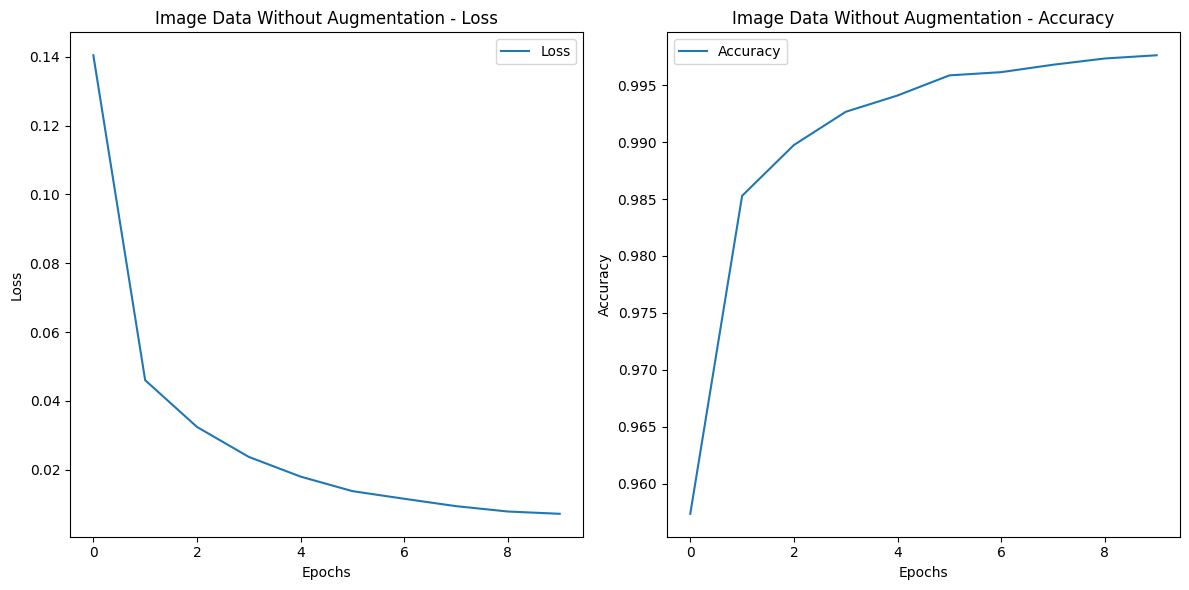

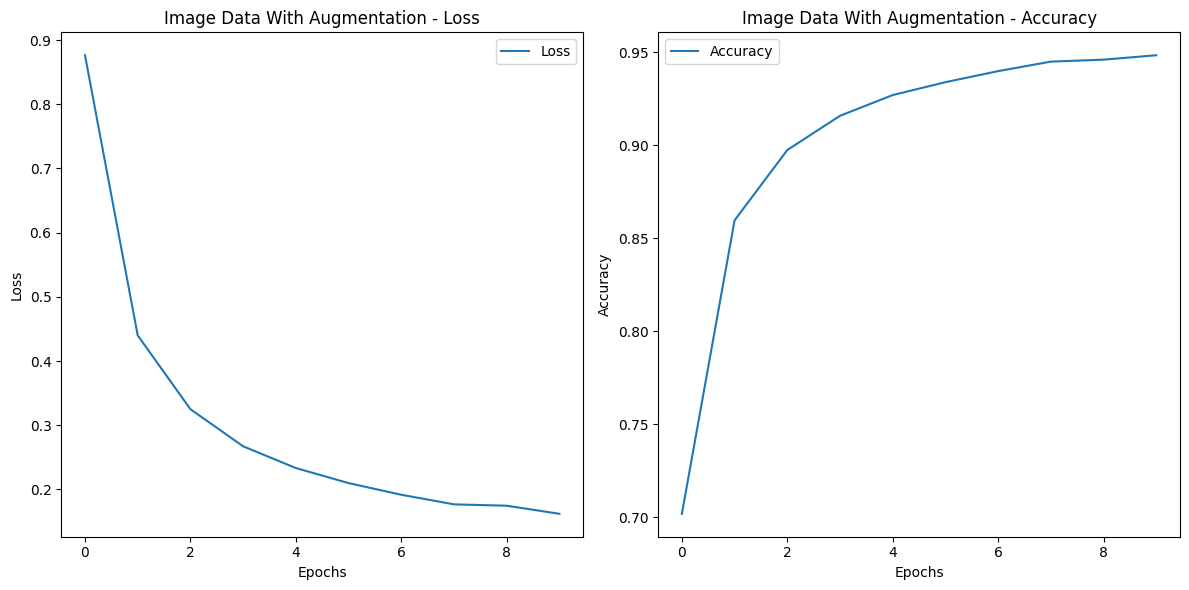

In [161]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255

# Define the image model
def create_image_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the image model
model_image = create_image_model()

# Data augmentation generator
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = image_gen.flow(X_train, y_train, batch_size=32)

# Train the model without augmentation
history_image_no_aug = model_image.fit(X_train, y_train, epochs=10, verbose=1)

# Train the model with augmentation
model_image = create_image_model()  # Recreate to reset weights
history_image_aug = model_image.fit(train_generator, epochs=10, verbose=1, steps_per_epoch=len(X_train) // 32)

# Visualization function
def plot_training(history, title="Model Training"):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    if 'accuracy' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Accuracy')
        plt.title(title + ' - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plotting the training history
plot_training(history_image_no_aug, "Image Data Without Augmentation")
plot_training(history_image_aug, "Image Data With Augmentation")


## **2. Video Data Augmentation**

In [142]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, TimeDistributed, LSTM, Flatten, InputLayer
from tensorflow.keras.models import Sequential

# Dummy video data: 100 video samples, each with 30 frames of size 64x64
video_data = np.random.rand(100, 30, 64, 64, 1)

# Function to preprocess video data to the required input shape
def preprocess_video_data(video_batch, target_size=(60, 60)):
    # Assuming video_batch shape is (n_samples, n_frames, height, width, channels)
    processed = np.zeros((video_batch.shape[0], video_batch.shape[1], *target_size, video_batch.shape[-1]))
    for i in range(video_batch.shape[0]):
        for j in range(video_batch.shape[1]):
            # Simple center crop for the non-augmented data
            start_x = (video_batch.shape[2] - target_size[0]) // 2
            start_y = (video_batch.shape[3] - target_size[1]) // 2
            processed[i, j] = video_batch[i, j, start_x:start_x+target_size[0], start_y:start_y+target_size[1], :]
    return processed

# Preprocess the original video data
video_data_processed = preprocess_video_data(video_data)

# Video data augmentation (random cropping)
def random_crop(video_batch, target_size=(60, 60)):
    cropped = np.zeros((video_batch.shape[0], video_batch.shape[1], *target_size, video_batch.shape[-1]))
    for i in range(video_batch.shape[0]):
        for j in range(video_batch.shape[1]):
            start_x = np.random.randint(0, video_batch.shape[2] - target_size[0])
            start_y = np.random.randint(0, video_batch.shape[3] - target_size[1])
            cropped[i, j] = video_batch[i, j, start_x:start_x+target_size[0], start_y:start_y+target_size[1], :]
    return cropped

# Generate augmented video data
video_data_augmented = random_crop(video_data)

# Define video model with the correct input dimensions
def create_video_model():
    model = Sequential([
        InputLayer(input_shape=(30, 60, 60, 1)),
        TimeDistributed(Conv2D(16, (3, 3), activation='relu')),
        TimeDistributed(MaxPooling2D(2, 2)),
        TimeDistributed(Flatten()),
        LSTM(50),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model without augmentation
model_video_no_aug = create_video_model()
model_video_no_aug.fit(video_data_processed, np.random.randint(0, 2, 100), epochs=10, verbose=0)

# Train model with augmentation
model_video_aug = create_video_model()
model_video_aug.fit(video_data_augmented, np.random.randint(0, 2, 100), epochs=10, verbose=0)


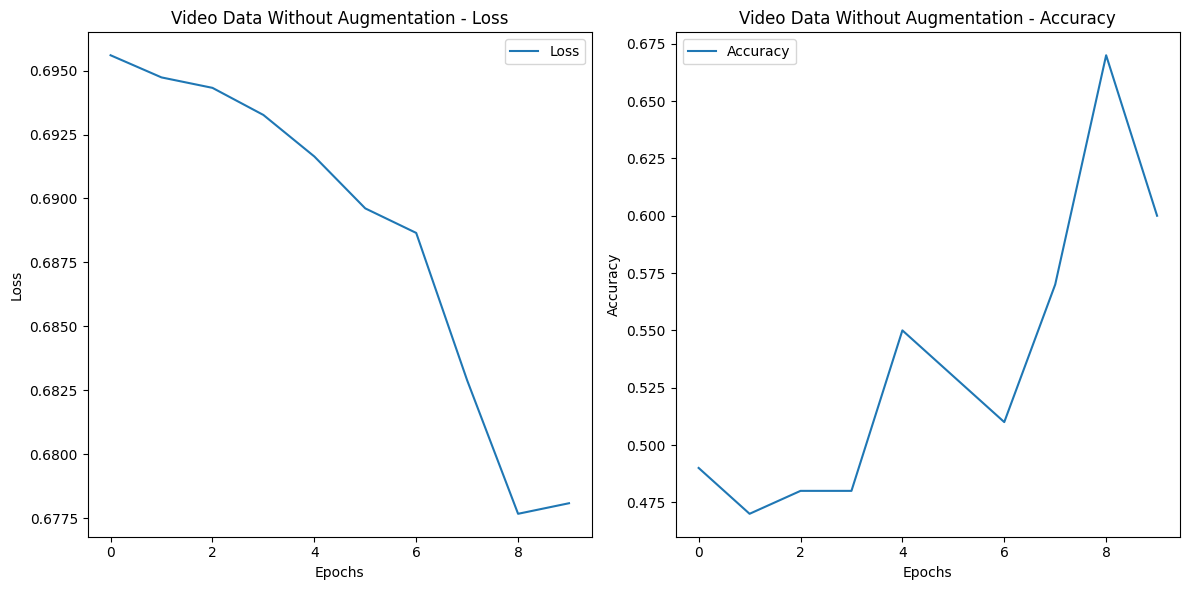

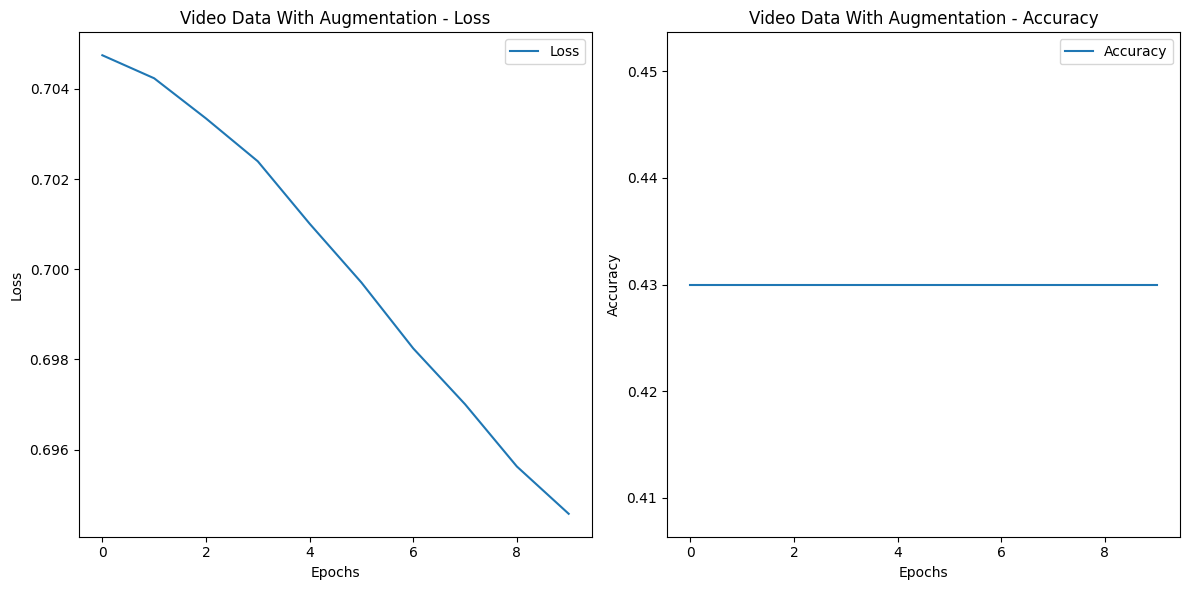

In [162]:
history_video_no_aug = model_video_no_aug.fit(video_data_processed, np.random.randint(0, 2, 100), epochs=10, verbose=0)
history_video_aug = model_video_aug.fit(video_data_augmented, np.random.randint(0, 2, 100), epochs=10, verbose=0)

plot_training(history_video_no_aug, "Video Data Without Augmentation")
plot_training(history_video_aug, "Video Data With Augmentation")


## **3. Tabular Data Augmentation**

In [143]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tabular data augmentation (noise injection)
noise = np.random.normal(0, 0.1, X_train_scaled.shape)
X_train_augmented = X_train_scaled + noise

# Define tabular model
def create_tabular_model():
    model = Sequential([
        Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model without augmentation
model_tabular_no_aug = create_tabular_model()
model_tabular_no_aug.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

# Train model with augmentation
model_tabular_aug = create_tabular_model()
model_tabular_aug.fit(X_train_augmented, y_train, epochs=50, validation_split=0.2, verbose=0)


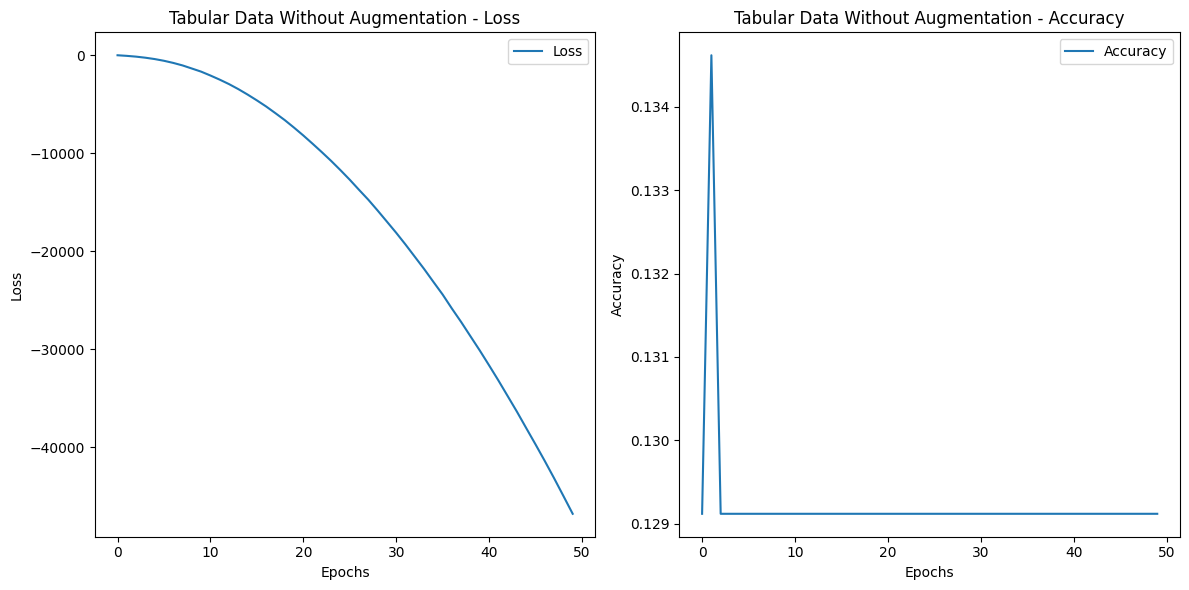

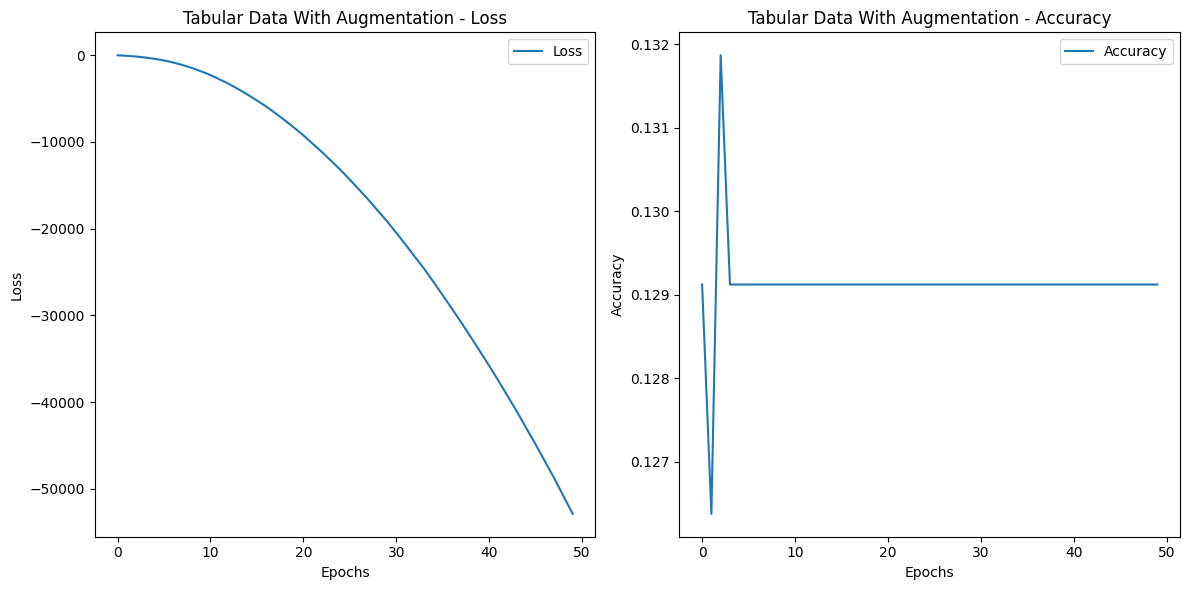

In [163]:
history_tabular_no_aug = model_tabular_no_aug.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)
history_tabular_aug = model_tabular_aug.fit(X_train_augmented, y_train, epochs=50, validation_split=0.2, verbose=0)

plot_training(history_tabular_no_aug, "Tabular Data Without Augmentation")
plot_training(history_tabular_aug, "Tabular Data With Augmentation")


## **4. Text Data Augmentation**

In [147]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
import numpy as np

# Dummy text data
texts = ['This is a good day', 'I love machine learning', 'Data science is fun', 'TensorFlow is awesome', 'Keras simplifies complexity']
augmented_texts = ['This is a great day', 'I adore machine learning', 'Data science is enjoyable', 'TensorFlow is impressive', 'Keras eases complexity']

# Vectorization
vectorizer = TextVectorization(max_tokens=100, output_sequence_length=5)
vectorizer.adapt(texts + augmented_texts)

# Convert texts to tensors
text_tensor = vectorizer(texts)
augmented_text_tensor = vectorizer(augmented_texts)

# Labels (dummy binary classification)
labels = np.array([0, 1, 0, 1, 0])

# Define text model
def create_text_model():
    model = Sequential([
        Embedding(input_dim=100, output_dim=32, input_length=5),  # Set input_length based on output_sequence_length of vectorizer
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model without augmentation
model_text_no_aug = create_text_model()
model_text_no_aug.fit(text_tensor, labels, epochs=10, verbose=0)

# Train model with augmentation
model_text_aug = create_text_model()
model_text_aug.fit(augmented_text_tensor, labels, epochs=10, verbose=0)


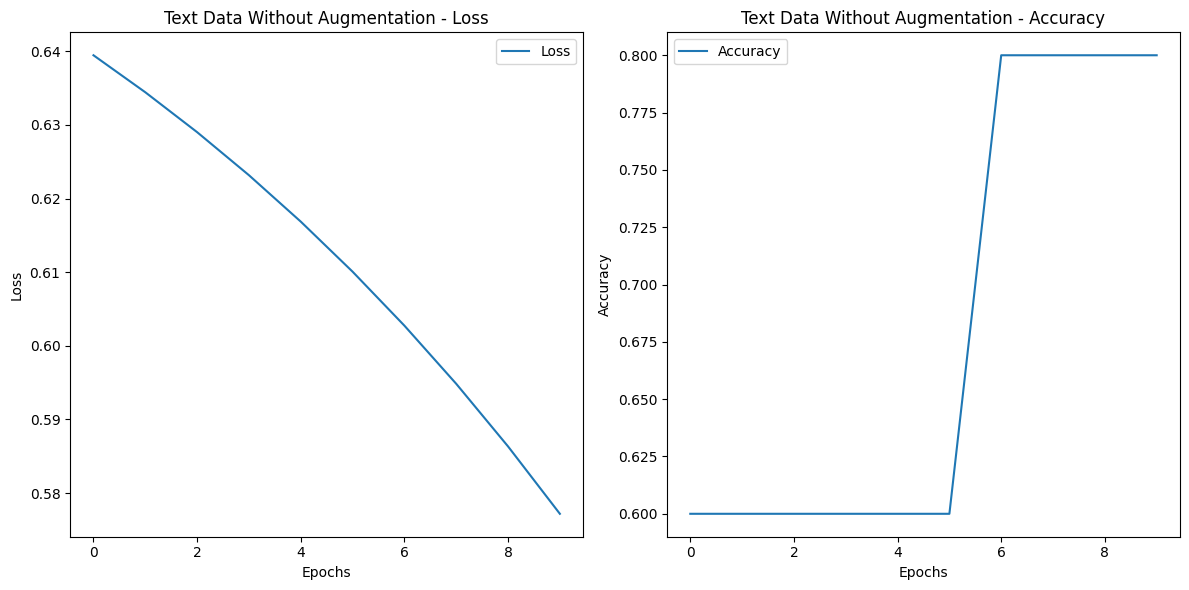

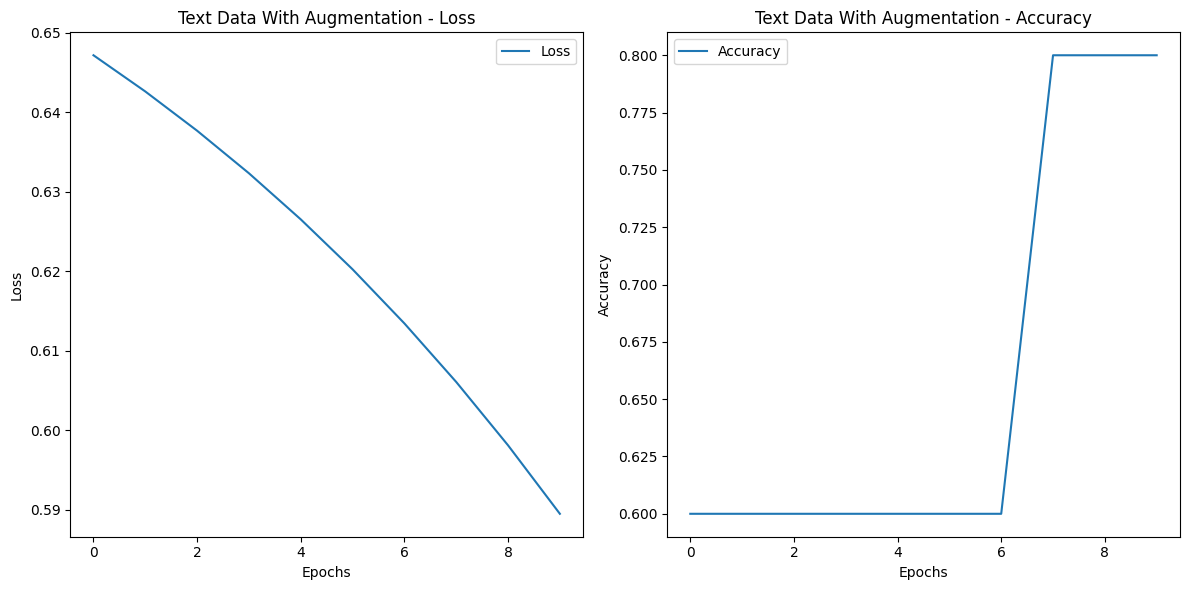

In [164]:
history_text_no_aug = model_text_no_aug.fit(text_tensor, labels, epochs=10, verbose=0)
history_text_aug = model_text_aug.fit(augmented_text_tensor, labels, epochs=10, verbose=0)

plot_training(history_text_no_aug, "Text Data Without Augmentation")
plot_training(history_text_aug, "Text Data With Augmentation")


## **5. Time Series Data Augmentation**

In [145]:
# Dummy time series data
time_series_data = np.random.randn(100, 10)  # 100 samples, 10 time steps each

# Time series data augmentation (jittering)
noise = np.random.normal(0, 0.1, time_series_data.shape)
augmented_time_series = time_series_data + noise

# Define time series model
def create_time_series_model():
    model = Sequential([
        LSTM(50, input_shape=(10, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train model without augmentation
model_ts_no_aug = create_time_series_model()
model_ts_no_aug.fit(time_series_data, np.random.rand(100), epochs=10, verbose=0)

# Train model with augmentation
model_ts_aug = create_time_series_model()
model_ts_aug.fit(augmented_time_series, np.random.rand(100), epochs=10, verbose=0)


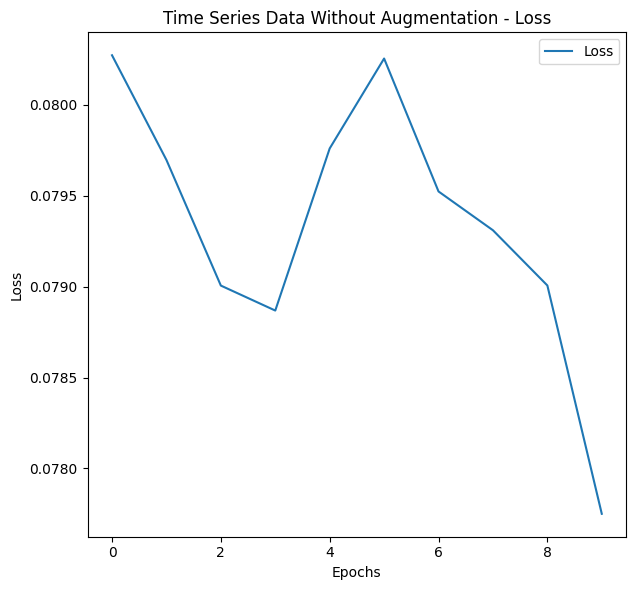

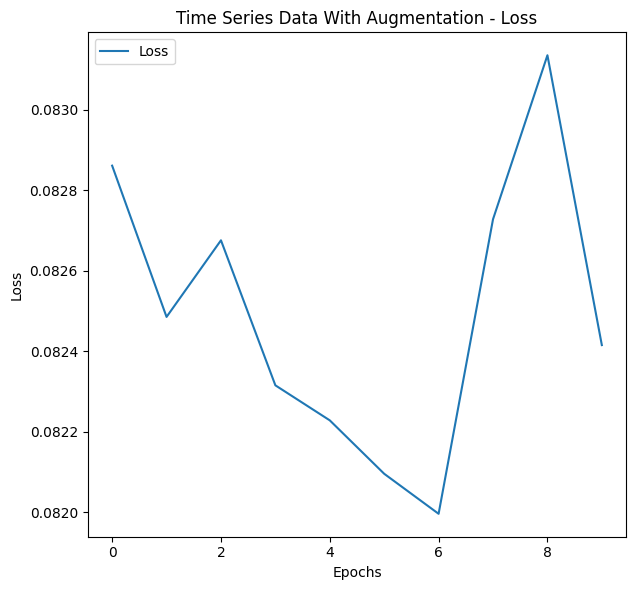

In [165]:
history_ts_no_aug = model_ts_no_aug.fit(time_series_data, np.random.rand(100), epochs=10, verbose=0)
history_ts_aug = model_ts_aug.fit(augmented_time_series, np.random.rand(100), epochs=10, verbose=0)

plot_training(history_ts_no_aug, "Time Series Data Without Augmentation")
plot_training(history_ts_aug, "Time Series Data With Augmentation")


## **6. Speech Data Augmentation**

In [146]:
# Dummy speech data (simulated as random noise)
speech_data = np.random.randn(100, 8000)  # 100 samples, 8000 sample points (1 sec of audio at 8kHz)

# Speech data augmentation (adding noise)
noise = np.random.normal(0, 0.02, speech_data.shape)
augmented_speech = speech_data + noise

# Define speech model
def create_speech_model():
    model = Sequential([
        LSTM(50, input_shape=(8000, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train model without augmentation
model_speech_no_aug = create_speech_model()
model_speech_no_aug.fit(speech_data, np.random.rand(100), epochs=10, verbose=0)

# Train model with augmentation
model_speech_aug = create_speech_model()
model_speech_aug.fit(augmented_speech, np.random.rand(100), epochs=10, verbose=0)


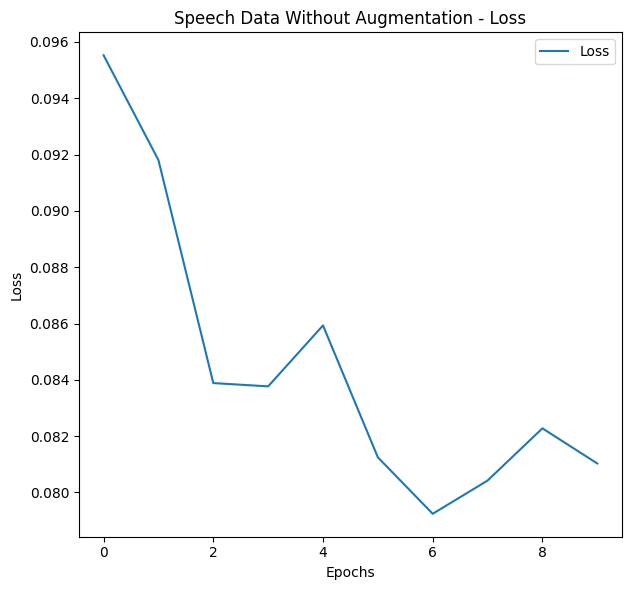

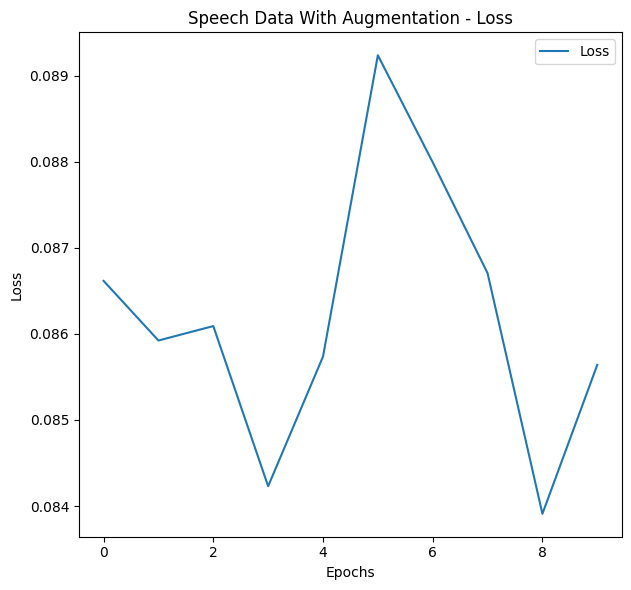

In [166]:
history_speech_no_aug = model_speech_no_aug.fit(speech_data, np.random.rand(100), epochs=10, verbose=0)
history_speech_aug = model_speech_aug.fit(augmented_speech, np.random.rand(100), epochs=10, verbose=0)

plot_training(history_speech_no_aug, "Speech Data Without Augmentation")
plot_training(history_speech_aug, "Speech Data With Augmentation")


## **7. Document Image Data Augmentation**

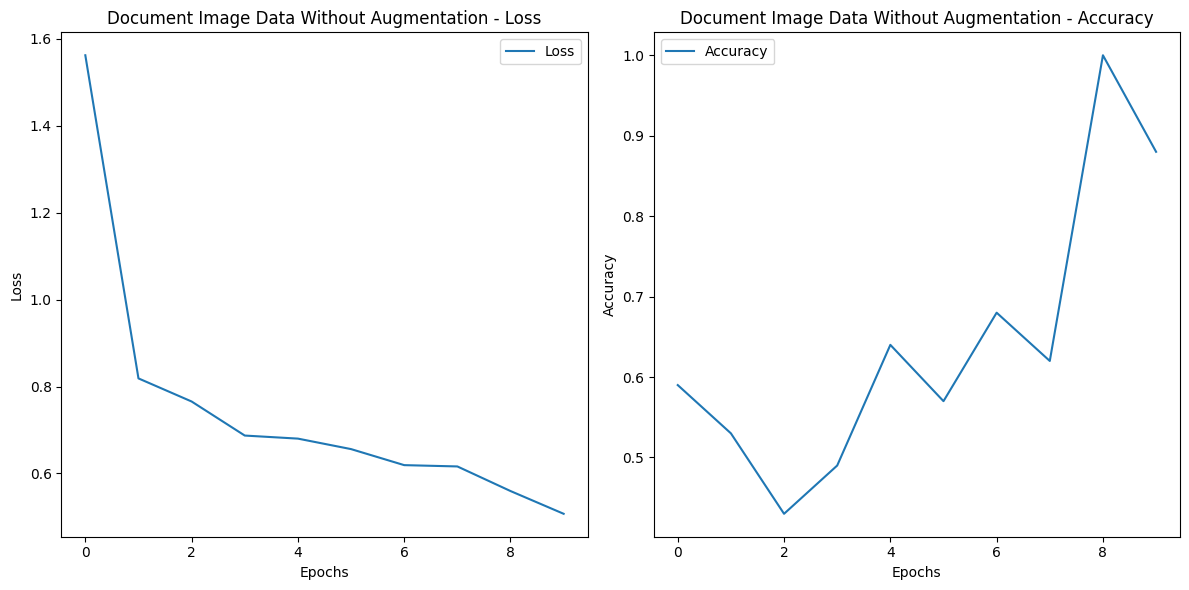

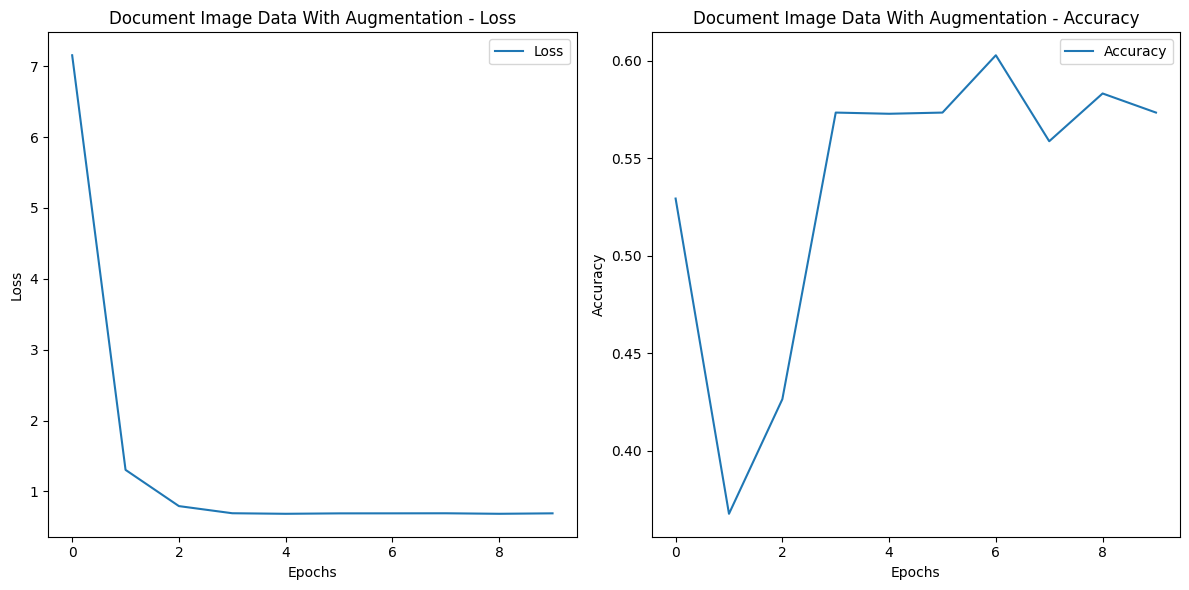

In [168]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

# Simulated document image data
np.random.seed(42)
document_images = np.random.rand(100, 128, 128, 1)
labels = np.random.randint(0, 2, size=(100,))

# Initialize the data generator with augmentation options
doc_image_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Prepare the generator to yield batches of training data
augmented_images = doc_image_gen.flow(document_images, labels, batch_size=32)

# Define a model for document image classification
def create_doc_image_model():
    model = Sequential([
        InputLayer(input_shape=(128, 128, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model without augmentation
model_doc_img_no_aug = create_doc_image_model()
history_doc_img_no_aug = model_doc_img_no_aug.fit(document_images, labels, epochs=10, verbose=0)

# Initialize and train the model with augmentation
model_doc_img_aug = create_doc_image_model()
history_doc_img_aug = model_doc_img_aug.fit(augmented_images, steps_per_epoch=len(document_images) // 32, epochs=10, verbose=0)

# Visualization function
def plot_training(history, title="Model Training"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotting the training history
plot_training(history_doc_img_no_aug, "Document Image Data Without Augmentation")
plot_training(history_doc_img_aug, "Document Image Data With Augmentation")


# **l) Demonstrate fastai data augmentation capablities**

Epoch 1/3
32/32 - 5s - loss: 2.2971 - accuracy: 0.1420 - val_loss: 2.2761 - val_accuracy: 0.1007 - 5s/epoch - 154ms/step
Epoch 2/3
32/32 - 3s - loss: 2.2287 - accuracy: 0.1650 - val_loss: 2.2114 - val_accuracy: 0.1267 - 3s/epoch - 94ms/step
Epoch 3/3
32/32 - 3s - loss: 2.1310 - accuracy: 0.1820 - val_loss: 2.1407 - val_accuracy: 0.1523 - 3s/epoch - 94ms/step
Epoch 1/3
31/31 - 5s - loss: 2.2809 - accuracy: 0.1230 - val_loss: 2.2131 - val_accuracy: 0.0133 - 5s/epoch - 167ms/step
Epoch 2/3
31/31 - 4s - loss: 2.1558 - accuracy: 0.0165 - val_loss: 2.1406 - val_accuracy: 0.1790 - 4s/epoch - 113ms/step
Epoch 3/3
31/31 - 3s - loss: 2.0311 - accuracy: 0.0992 - val_loss: 1.9801 - val_accuracy: 0.0438 - 3s/epoch - 112ms/step


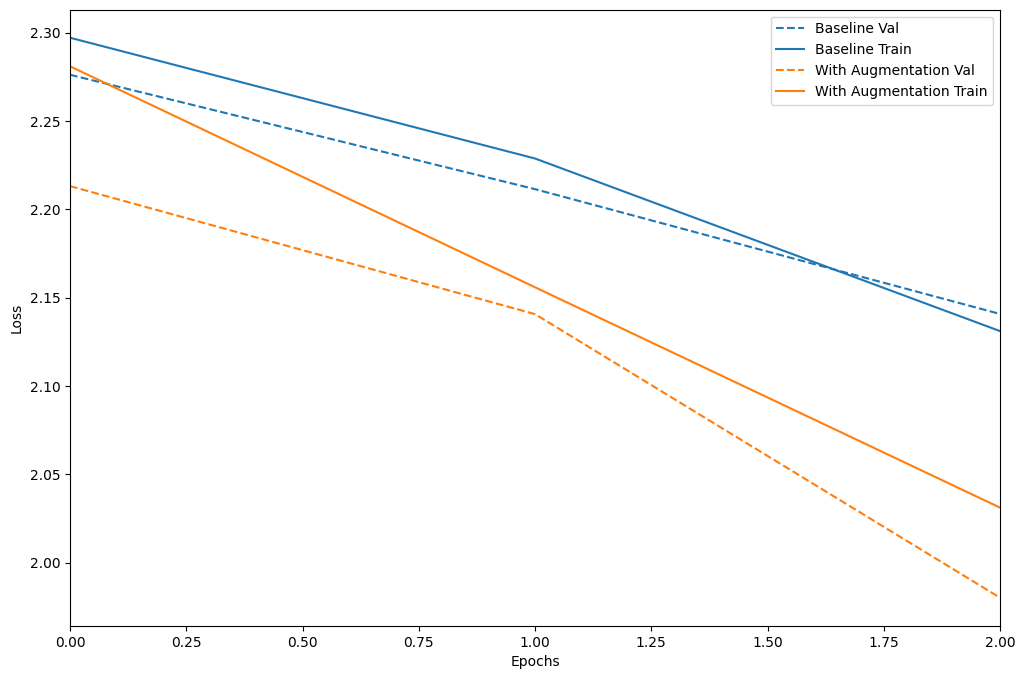

In [176]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, y_train = X_train[:1000], y_train[:1000]  # Reduce dataset size
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Define a simpler CNN model
def create_simple_model():
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training function with optional data augmentation
def train_model(use_augmentation=False):
    model = create_simple_model()
    if use_augmentation:
        generator = train_datagen.flow(X_train, y_train, batch_size=32)
        history = model.fit(generator, epochs=3, steps_per_epoch=len(X_train) // 32, validation_data=(X_test, y_test), verbose=2)
    else:
        history = model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_test, y_test), verbose=2)
    return history


def plot_history(histories):
    plt.figure(figsize=(12,8))
    max_epoch = 0  # This will store the maximum number of epochs across all histories
    for name, history in histories:
        epochs = len(history.epoch)  # Get the number of epochs for the current history
        max_epoch = max(max_epoch, epochs)  # Update the maximum epoch count
        val = plt.plot(history.epoch, history.history['val_loss'],
                       '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
                 label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.xlim([0, max_epoch - 1])  # Set the x-axis limit from 0 to max_epoch-1
    plt.show()


# Perform training and capture histories
history_no_aug = train_model(use_augmentation=False)
history_aug = train_model(use_augmentation=True)

# Plotting the training and validation loss
plot_history([
    ('Baseline', history_no_aug),  # history_no_aug is the history object from non-augmented training
    ('With Augmentation', history_aug)  # history_aug is the history object from augmented training
])